In [0]:
import pandas as pd

uri = "https://raw.githubusercontent.com/alura-cursos/introducao-a-data-science/master/aula4.1/movies.csv"
filmes = pd.read_csv(uri) # dataframe
filmes.columns = ["filmeId", "titulo", "generos"]
filmes = filmes.set_index('filmeId')
filmes = filmes.join(filmes['generos'].str.get_dummies()).drop('generos', axis = 1)
filmes['ano'] = filmes['titulo'].str.extract(r'.*\((\d+)\)')
filmes = filmes.dropna()
# filmes.head()

In [0]:
uri = "https://raw.githubusercontent.com/alura-cursos/introducao-a-data-science/master/aula1.2/ratings.csv"
notas = pd.read_csv(uri)
notas.columns = ["usuarioId", "filmeId", "nota", "momento"]
arredondadas = notas['nota'].round(1)
# notas.head()

In [0]:
medias = notas.groupby('filmeId')['nota'].mean()
filmes = filmes.join(medias).dropna().sort_values('nota', ascending=False).rename(columns={'nota': 'media'})

total = notas.groupby('filmeId')['momento'].count()
filmes = filmes.join(total)
filmes = filmes.rename(columns={'momento': 'total'})
filmes = filmes.query("total > 50")
filmes['media_categoria'] = (filmes['media']).round(1).values

random_filmes = filmes.sample(10)
# random_filmes.head()

In [0]:
filmes.head()

,titulo,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,ano,media,total,media_categoria
filmeId,,,,,,,,,,,,,,,,,,,,,,,,,
318,"Shawshank Redemption, The (1994)",0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1994,4.429022,317,4.4
858,"Godfather, The (1972)",0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1972,4.289062,192,4.3
2959,Fight Club (1999),0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1999,4.272936,218,4.3
1276,Cool Hand Luke (1967),0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1967,4.271930,57,4.3
750,Dr. Strangelove or: How I Learned to Stop Worr...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1964,4.268041,97,4.3


In [0]:
notas.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [0]:
random_filmes

,titulo,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,ano,media,total,media_categoria
filmeId,,,,,,,,,,,,,,,,,,,,,,,,,
25,Leaving Las Vegas (1995),0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1995,3.625000,76,3.6
2194,"Untouchables, The (1987)",0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1987,3.938462,65,3.9
35836,"40-Year-Old Virgin, The (2005)",0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,2005,3.547297,74,3.5
3,Grumpier Old Men (1995),0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1995,3.259615,52,3.3
442,Demolition Man (1993),0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1993,3.092593,81,3.1
3421,Animal House (1978),0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1978,3.693548,62,3.7
3793,X-Men (2000),0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2000,3.699248,133,3.7
5816,Harry Potter and the Chamber of Secrets (2002),0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2002,3.598039,102,3.6
435,Coneheads (1993),0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1993,2.420635,63,2.4


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb4652e8c50>,
      dtype=object)

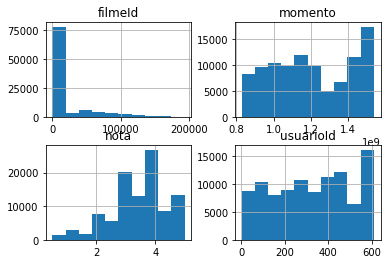

In [0]:
notas.hist()

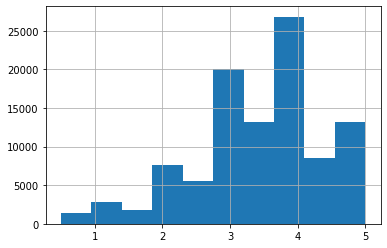

In [0]:
notas['nota'].hist()

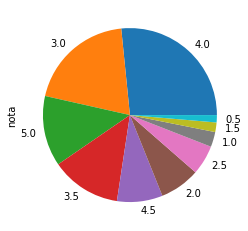

In [0]:
arredondadas.value_counts().plot.pie()

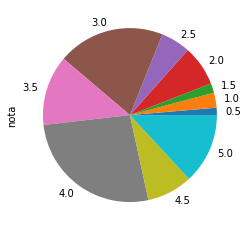

In [0]:
arredondadas.value_counts().to_frame().reset_index().sort_values("index").set_index("index")["nota"].plot.pie() # gráfico anterior ordenado

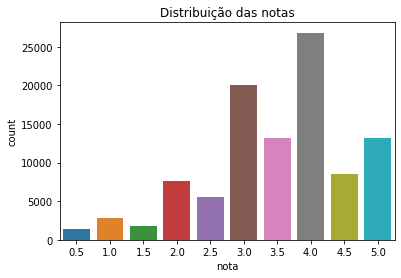

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(arredondadas)
plt.title("Distribuição das notas");

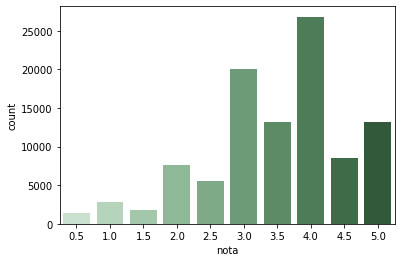

In [0]:
palette = sns.color_palette("Blues", 10) # defina a paleta de cores e a quantidade usada
palette = sns.cubehelix_palette(10, start=2, rot=0, dark=.3, light=.85)
sns.countplot(arredondadas, palette=palette)

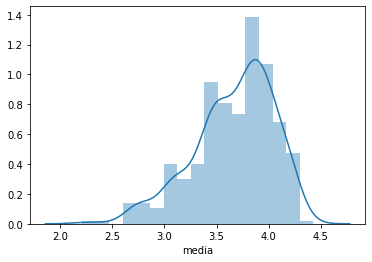

In [0]:
sns.distplot(filmes['media'])

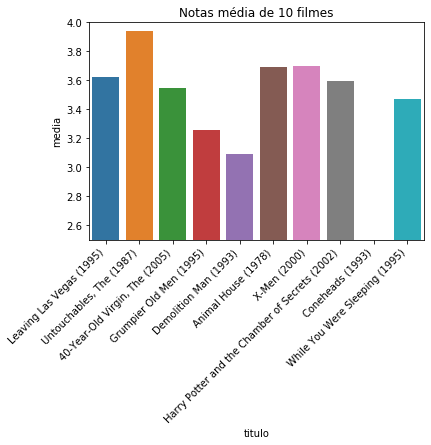

In [0]:
p = sns.barplot(data = random_filmes, x = "titulo", y = "media")
p.set_xticklabels(p.get_xticklabels(), rotation = 45, horizontalalignment = 'right')
plt.ylim(2.5, 4) # começa em 2.5
plt.title("Notas média de 10 filmes")
plt.show()

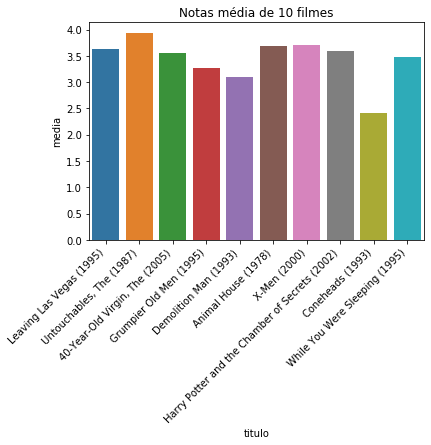

In [0]:
p = sns.barplot(data = random_filmes, x = "titulo", y = "media")
p.set_xticklabels(p.get_xticklabels(), rotation = 45, horizontalalignment = 'right')
plt.title("Notas média de 10 filmes")
plt.show()

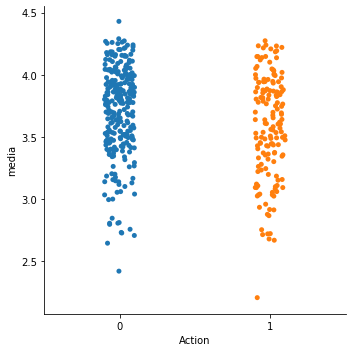

In [0]:
sns.catplot(data = filmes, x = "Action", y = "media")

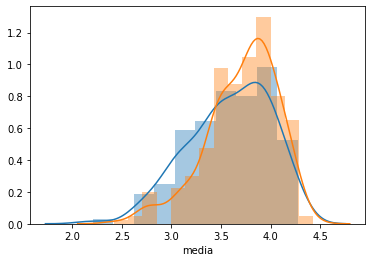

In [0]:
sns.distplot(filmes.query("Action == 1")['media'])
sns.distplot(filmes.query("Action == 0")['media'])

In [0]:
ids_aleatorios = ",".join(random_filmes.index.values.astype(str))
query = f"filmeId in ({ids_aleatorios})"
query

'filmeId in (25,2194,35836,3,442,3421,3793,5816,435,339)'

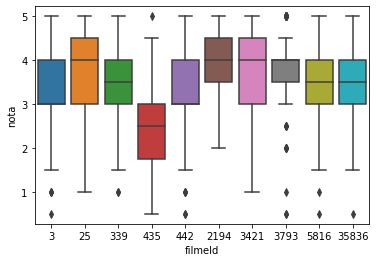

In [0]:
sns.boxplot(data = notas.query(query), x = "filmeId", y = "nota")
plt.show()

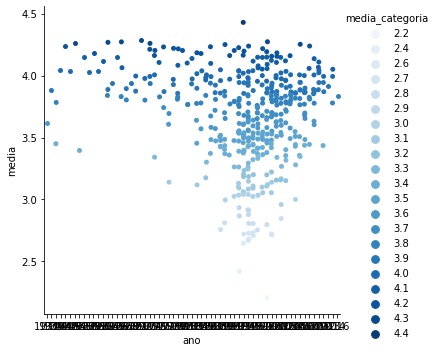

In [0]:
total_de_categorias = len(filmes['media_categoria'].unique())
sns.catplot(data = filmes, x = "ano", y = "media", palette=sns.color_palette("Blues", total_de_categorias), hue = "media_categoria")
plt.show()